<a href="https://colab.research.google.com/github/maryembenghouma/Devops/blob/master/PROJET_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate','xAttack','DifficultyLevel']

In [ ]:
attack_classes = {
    'normal': 'normal',
    'dos': 'neptune, back, land, pod, smurf, teardrop, mailbomb, apache2, processtable, udpstorm, worm',
    'u2r': 'buffer_overflow, loadmodule, perl, rootkit, ps, sqlattack, xterm',
    'r2l': 'ftp_write, guess_passwd, imap, multihop, phf, spy, warezclient, warezmaster, sendmail, named, snmpgetattack, snmpguess, xlock, xsnoop, httptunnel',
    'probe': 'ipsweep, nmap, portsweep, satan, mscan, saint'
}

attack_classes = {key: value.strip().split(', ') for key, value in attack_classes.items()}
attacks_types = {attack: attack_type for attack_type, attacks in attack_classes.items() for attack in attacks}

print(attacks_types)

{'normal': 'normal', 'neptune': 'dos', 'back': 'dos', 'land': 'dos', 'pod': 'dos', 'smurf': 'dos', 'teardrop': 'dos', 'mailbomb': 'dos', 'apache2': 'dos', 'processtable': 'dos', 'udpstorm': 'dos', 'worm': 'dos', 'buffer_overflow': 'u2r', 'loadmodule': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r', 'ps': 'u2r', 'sqlattack': 'u2r', 'xterm': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'multihop': 'r2l', 'phf': 'r2l', 'spy': 'r2l', 'warezclient': 'r2l', 'warezmaster': 'r2l', 'sendmail': 'r2l', 'named': 'r2l', 'snmpgetattack': 'r2l', 'snmpguess': 'r2l', 'xlock': 'r2l', 'xsnoop': 'r2l', 'httptunnel': 'r2l', 'ipsweep': 'probe', 'nmap': 'probe', 'portsweep': 'probe', 'satan': 'probe', 'mscan': 'probe', 'saint': 'probe'}


In [ ]:
 #We import the dataset through the panda library
Data=pd.read_csv('KDDTrain+.csv',names = columns)
test=pd.read_csv('KDDTrain+_20Percent.csv',names = columns)
unique_values = Data['xAttack'].unique()
print("Unique values in 'xAttack':", unique_values)


Unique values in 'xAttack': ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [ ]:
Data['Attack Type'] = Data.xAttack.apply(lambda r: attacks_types[r.strip().lower()])


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
Data.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# Finding categorical features
num_cols = Data._get_numeric_data().columns

cate_cols = list(set(Data.columns)-set(num_cols))
cate_cols.remove('xAttack')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'flag', 'service']

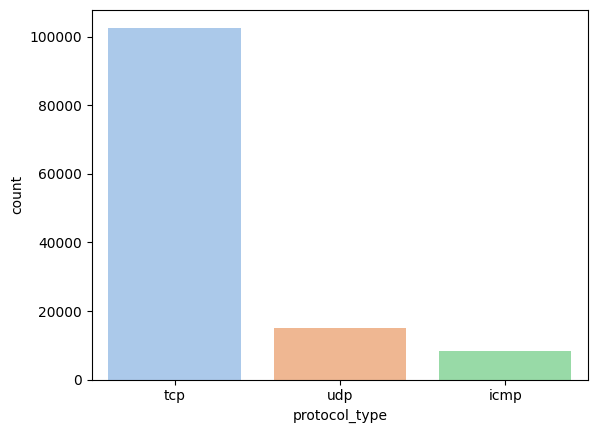

In [ ]:
sns.countplot(x="protocol_type",data=Data,palette="pastel")
plt.show()

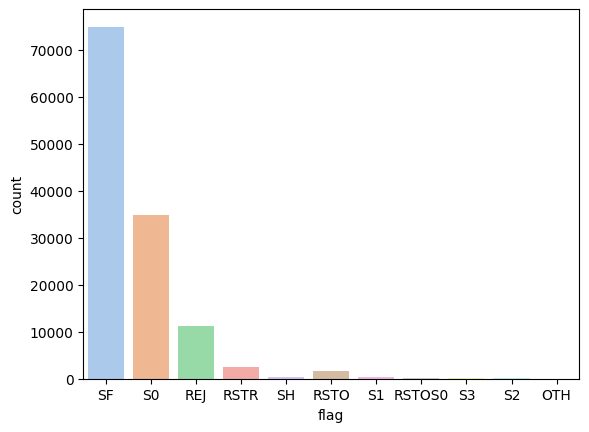

In [ ]:
sns.countplot(x="flag",data=Data,palette="pastel")
plt.show()

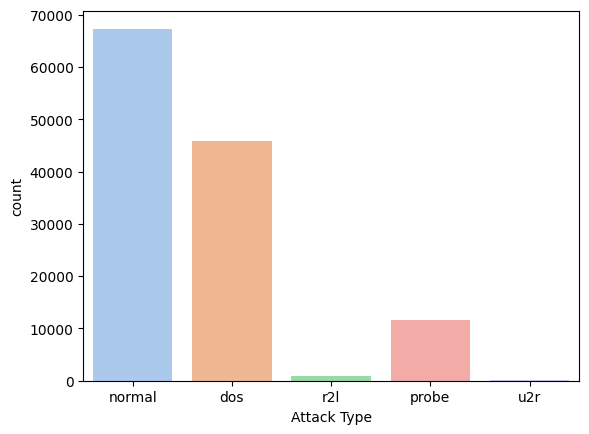

In [ ]:
sns.countplot(x="Attack Type",data=Data,palette="pastel")
plt.show()

<ipython-input-13-96a2628517d2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Data.corr()


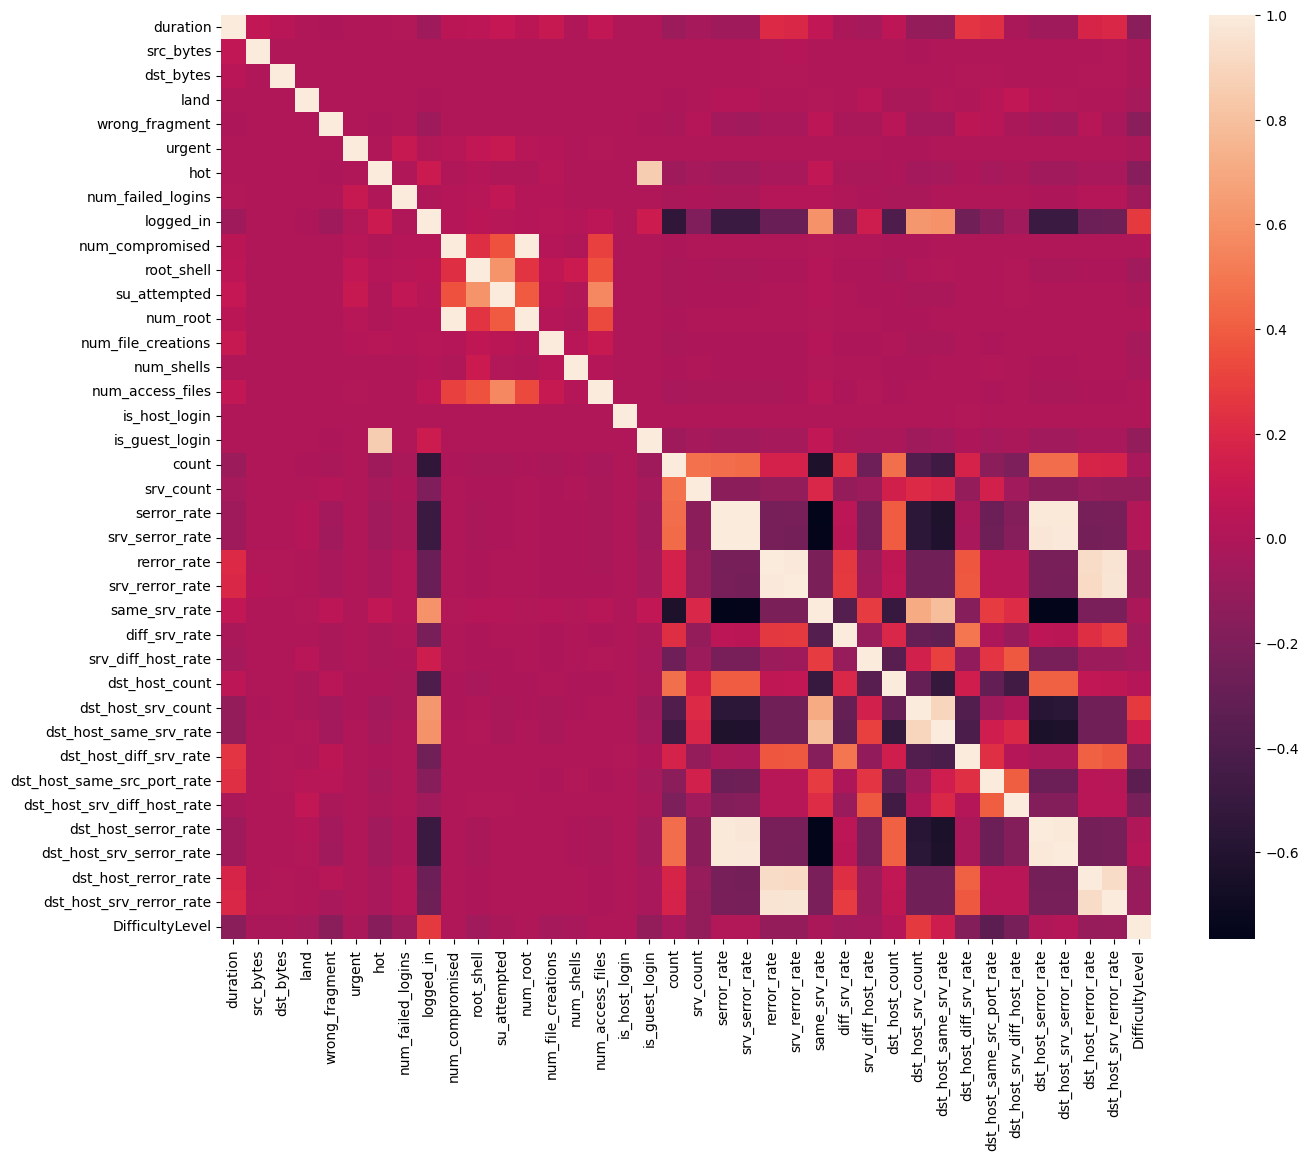

In [ ]:
Data = Data[[col for col in Data if Data[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = Data.corr()

plt.figure(figsize =(15, 12))

sns.heatmap(corr)

plt.show()

In [ ]:
X_oh=Data.drop(['service','flag'],axis=1)
X_oh.values.reshape(1, -1)
X_oh

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,DifficultyLevel,Attack Type
0,0,tcp,491,0,0,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,146,0,0,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,232,8153,0,0,0,0,0,1,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,199,420,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,dos
125969,8,udp,105,145,0,0,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,normal
125970,0,tcp,2231,384,0,0,0,0,0,1,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,normal
125971,0,tcp,0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,dos


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder



# Assuming 'protocol_type' is a column in your DataFrame
protocol_type = X_oh['protocol_type']

# Use LabelEncoder to convert categorical values to numerical labels
label_encoder = LabelEncoder()
encoded_protocol_type = label_encoder.fit_transform(protocol_type)

# Reshape the data to make it 2D
reshaped_protocol_type = encoded_protocol_type.reshape(-1, 1)

# OneHotEncoder
OH = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_X = pd.DataFrame(OH.fit_transform(reshaped_protocol_type), columns=[f'protocol_type_{label}' for label in label_encoder.classes_])
# Assign the index from the original DataFrame
OH_X.index = X_oh.index

# Drop the 'protocol_type' column from the original DataFrame
num_X = X_oh.drop(['protocol_type'], axis=1)

# Concatenate the one-hot encoded DataFrame with the remaining numerical features
OH_X = pd.concat([OH_X, num_X], axis=1)

OH_X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,DifficultyLevel,Attack Type
0,0.0,1.0,0.0,0,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0.0,0.0,1.0,0,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0.0,1.0,0.0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0.0,1.0,0.0,0,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0.0,1.0,0.0,0,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#OH_X is your one-hot encoded DataFrame
# Identify non-numeric columns
non_numeric_cols = OH_X.select_dtypes(exclude=['float64', 'int64']).columns
excluded_columns = ['DifficultyLevel']
columns_to_exclude = list(excluded_columns) + list(non_numeric_cols)
# Standardize the numeric data (important for PCA)
numeric_cols = OH_X.columns.difference(columns_to_exclude)
scaler = StandardScaler()
OH_X_standardized = pd.DataFrame(scaler.fit_transform(OH_X[numeric_cols]), columns=numeric_cols)
columns_to_exclude
OH_X_standardized.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,-0.717045,-0.349683,-0.004919,-0.324063,-0.280282,-0.224532,0.069972,-0.782367,-0.639532,-0.818890,...,0.771283,-0.637209,-0.007679,-0.354343,-0.374560,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486
1,-0.620982,0.482201,-0.004919,0.734343,2.736852,-0.387635,2.367737,-1.161030,-0.639532,-1.035688,...,-1.321428,-0.637209,-0.007737,-0.368110,-0.374560,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486
2,0.339648,0.038529,-0.004919,0.734343,-0.174417,-0.387635,-0.480197,-0.938287,1.608759,-0.809857,...,-1.389669,1.602664,-0.007762,-0.299273,-0.374560,-0.374432,1.605104,-0.024437,-0.007736,-0.089486
3,-0.690846,-0.349683,-0.002891,-1.533670,-0.439078,-0.387635,-0.383108,1.066401,-0.572083,1.258754,...,0.771283,-0.189235,-0.007723,-0.313041,-0.374560,-0.374432,-0.184522,-0.024437,-0.007736,-0.089486
4,-0.472521,-0.349683,-0.004814,0.734343,-0.439078,-0.387635,-0.480197,1.066401,-0.639532,1.258754,...,0.771283,-0.637209,-0.007728,0.058678,-0.028179,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486


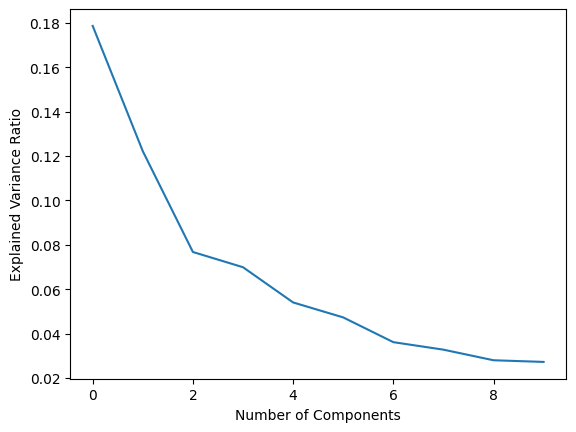

In [ ]:
#Concatenate the standardized numeric data with non-numeric columns
OH_X_final = pd.concat([OH_X_standardized, OH_X[columns_to_exclude]], axis=1)

# Choose the number of principal components you want to retain we first chose 10 components but with the elbow method we realize that 2 components are better
n_components = 2
# Apply PCA only to the numeric columns
pca1 = PCA(n_components=10)
OH_X_pca2=pca1.fit_transform(OH_X_standardized)
pca = PCA(n_components=2)
OH_X_pca = pca.fit_transform(OH_X_standardized)


plt.plot(pca1.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

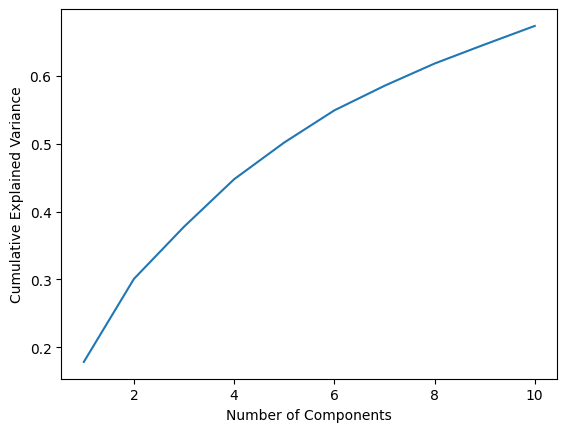

In [ ]:
plt.plot(range(1, len(pca1.explained_variance_ratio_) + 1), np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

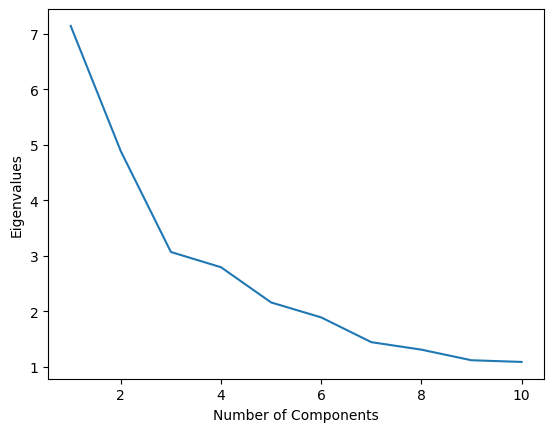

In [ ]:
# Plot the eigenvalues
plt.plot(range(1, len(pca1.explained_variance_) + 1), pca1.explained_variance_)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.show()

In [ ]:

# Create a DataFrame with the principal components
columns = [f'PC_{i+1}' for i in range(n_components)]
OH_X_pca_df = pd.DataFrame(data=OH_X_pca, columns=columns)

# Concatenate the principal components DataFrame with non-numeric columns
final_df = pd.concat([OH_X_pca_df, OH_X[columns_to_exclude]], axis=1)

# Display the resulting DataFrame
final_df.head()

,PC_1,PC_2,DifficultyLevel,xAttack,Attack Type
0,-0.581304,-0.056913,20,normal,normal
1,0.090733,1.045738,15,normal,normal
2,3.759002,-1.471138,19,neptune,dos
3,-2.175092,-1.008540,21,normal,normal
4,-1.976949,-0.851871,21,normal,normal


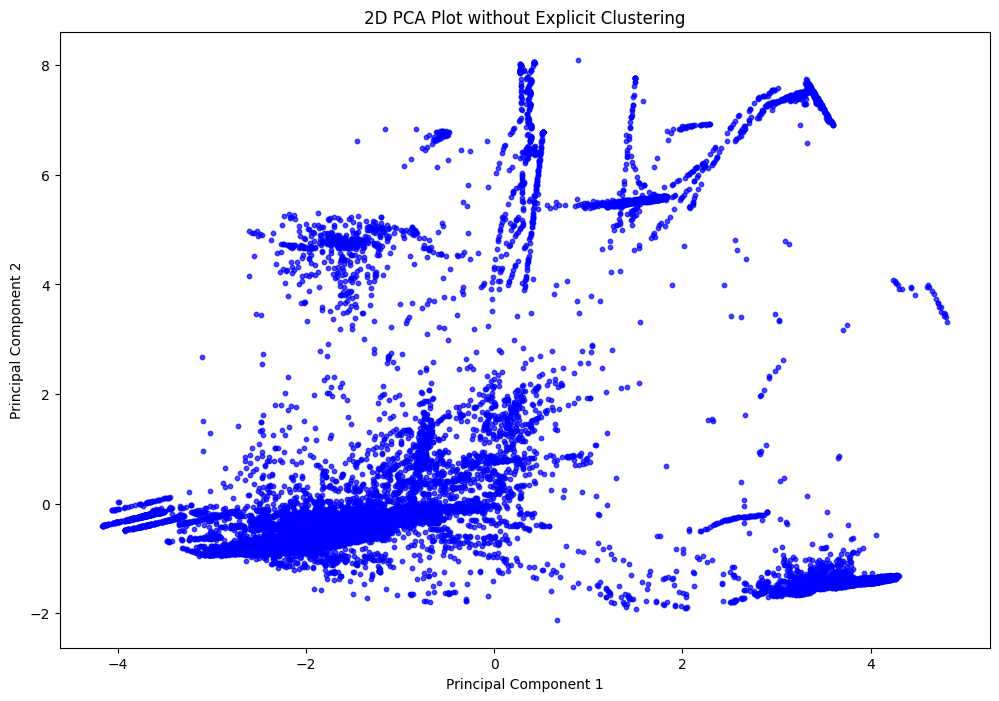

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming principal components are in 'PC_1' and 'PC_2' columns

# Sample a subset of points for visualization
sampled_points = final_df.sample(frac=0.2, random_state=42)

plt.figure(figsize=(12, 8))

# Scatter plot without explicit clustering
plt.scatter(
    sampled_points['PC_1'], sampled_points['PC_2'],
    color='blue',  # Set a single color for all points
    s=10, alpha=0.7
)

plt.title('2D PCA Plot without Explicit Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

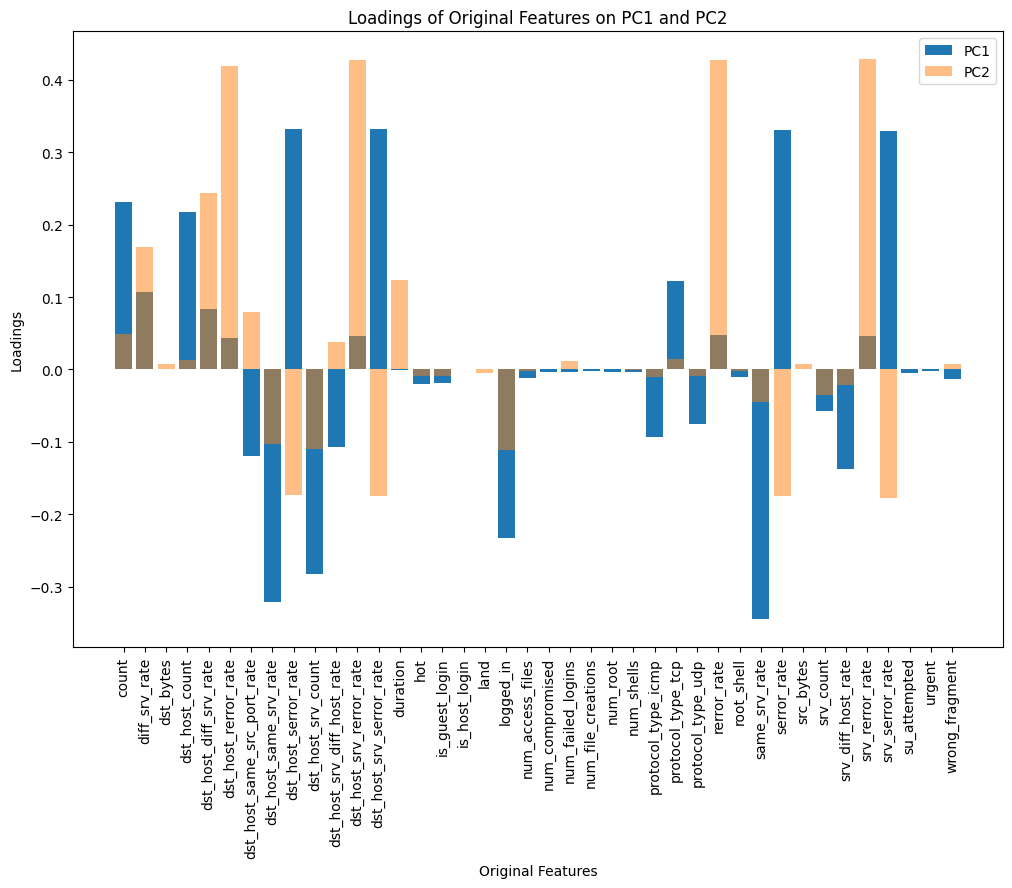

In [ ]:

# Get the loadings
loadings = pca.components_

# Create a DataFrame for easier analysis
loadings_df = pd.DataFrame(loadings, columns=OH_X_standardized.columns)

# Plot the loadings for the first two principal components
plt.figure(figsize=(12, 8))
plt.bar(range(len(loadings_df.columns)), loadings_df.iloc[0, :], label='PC1')
plt.bar(range(len(loadings_df.columns)), loadings_df.iloc[1, :], label='PC2', alpha=0.5)

plt.xticks(range(len(loadings_df.columns)), loadings_df.columns, rotation=90)
plt.xlabel('Original Features')
plt.ylabel('Loadings')
plt.title('Loadings of Original Features on PC1 and PC2')
plt.legend()
plt.show()

In [ ]:
DATA_PCA=OH_X_final.drop(columns=['dst_bytes','hot','is_guest_login','is_host_login','land','num_access_files','num_compromised','num_failed_logins','num_file_creations','num_root','num_shells','root_shell','src_bytes','su_attempted','urgent','wrong_fragment','xAttack'],axis=1)
DATA_PCA.head()

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,...,protocol_type_udp,rerror_rate,same_srv_rate,serror_rate,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,DifficultyLevel,Attack Type
0,-0.717045,-0.349683,-0.324063,-0.280282,-0.224532,0.069972,-0.782367,-0.639532,-0.818890,-0.289103,...,-0.367555,-0.374362,0.771283,-0.637209,-0.354343,-0.374560,-0.374432,-0.631929,20,normal
1,-0.620982,0.482201,0.734343,2.736852,-0.387635,2.367737,-1.161030,-0.639532,-1.035688,-0.289103,...,2.720684,-0.374362,-1.321428,-0.637209,-0.368110,-0.374560,-0.374432,-0.631929,15,normal
2,0.339648,0.038529,0.734343,-0.174417,-0.387635,-0.480197,-0.938287,1.608759,-0.809857,-0.289103,...,-0.367555,-0.374362,-1.389669,1.602664,-0.299273,-0.374560,-0.374432,1.605104,19,dos
3,-0.690846,-0.349683,-1.533670,-0.439078,-0.387635,-0.383108,1.066401,-0.572083,1.258754,0.066252,...,-0.367555,-0.374362,0.771283,-0.189235,-0.313041,-0.374560,-0.374432,-0.184522,21,normal
4,-0.472521,-0.349683,0.734343,-0.439078,-0.387635,-0.480197,1.066401,-0.639532,1.258754,-0.289103,...,-0.367555,-0.374362,0.771283,-0.637209,0.058678,-0.028179,-0.374432,-0.631929,21,normal


In [ ]:
from sklearn.model_selection import train_test_split

#Séparer les caractéristiques (X) et la variable cible (y)
X_PCA = DATA_PCA.drop(columns=['Attack Type'],axis=1)
y_PCA = OH_X_final['Attack Type']

#Séparation des données en ensembles d'entraînement et de test
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=23)
X_train_PCA.head()



,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,...,protocol_type_tcp,protocol_type_udp,rerror_rate,same_srv_rate,serror_rate,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,DifficultyLevel
86595,3.256471,-0.349683,-0.303903,-0.439078,-0.387635,2.756092,1.066401,-0.639532,0.328331,-0.289103,...,-2.100067,-0.367555,-0.374362,0.771283,-0.637209,5.909807,-0.374560,-0.374432,-0.631929,18
28117,1.466205,-0.016930,0.734343,-0.068553,-0.387635,-0.480197,-1.071933,1.608759,-0.945355,-0.289103,...,0.476175,-0.367555,-0.374362,-1.412415,1.602664,-0.230437,-0.374560,-0.374432,1.605104,20
840,-0.717045,-0.349683,-0.888546,-0.280282,-0.387635,1.914657,0.487269,-0.639532,-0.412394,-0.289103,...,-2.100067,2.720684,-0.374362,0.771283,-0.637209,-0.326808,1.549779,-0.374432,-0.631929,20
65674,3.728053,5.196208,0.734343,4.854138,1.993658,-0.480197,-1.161030,-0.032493,-1.035688,-0.289103,...,0.476175,-0.367555,2.309496,-1.503403,-0.323627,-0.368110,-0.374560,2.715365,-0.631929,20
114736,-0.647181,0.759495,-0.172862,-0.174417,-0.387635,0.167061,-1.138756,-0.617049,-1.035688,-0.289103,...,0.476175,-0.367555,-0.374362,-1.275934,-0.413222,-0.368110,-0.374560,-0.374432,-0.631929,17


In [ ]:
from sklearn.model_selection import train_test_split

#Séparer les caractéristiques (X) et la variable cible (y)
X = OH_X_final.drop(columns=['xAttack','Attack Type'],axis=1)
y = OH_X_final['Attack Type']

#Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment,DifficultyLevel
95141,-0.594783,-0.349683,-0.001204,-1.311908,-0.439078,-0.387635,-0.415471,1.066401,-0.639532,1.258754,...,-0.637209,-0.007726,-0.134065,0.279716,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486,21
37486,0.505575,-0.016930,-0.004919,0.734343,-0.121485,-0.387635,-0.480197,-1.138756,1.608759,-1.026654,...,1.602664,-0.007762,-0.354343,-0.374560,-0.374432,1.605104,-0.024437,-0.007736,-0.089486,21
34926,1.649598,-0.016930,-0.004919,0.734343,-0.121485,2.874410,-0.480197,-1.094207,-0.639532,-0.972455,...,-0.637209,-0.007762,-0.271739,-0.374560,2.715365,-0.631929,-0.024437,-0.007736,-0.089486,19
34589,-0.559851,-0.349683,-0.004854,0.734343,-0.439078,-0.387635,-0.480197,1.066401,-0.639532,1.258754,...,-0.637209,-0.007718,-0.106530,-0.374560,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486,21
11420,1.658331,-0.349683,-0.004918,0.734343,-0.439078,-0.387635,2.756092,1.066401,-0.639532,1.258754,...,-0.637209,-0.007674,3.390380,-0.374560,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486,17


In [ ]:
colNames=list(X)

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_new = selector.fit_transform(X,y)
X_new.shape


(125973, 4)

In [ ]:
true=selector.get_support()
newcolindex=[i for i, x in enumerate(true) if x]
newcolname=list( colNames[i] for i in newcolindex )
newcolname

['dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'same_srv_rate',
 'serror_rate']

**Modeling **


 logistic Regression

In [ ]:
# Création du modèle de régression logistique

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

model = LogisticRegression()


model.fit(X_train_PCA, y_train_PCA)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test_PCA)

# Évaluation du modèle
accuracy = accuracy_score(y_test_PCA, y_pred)
print(f"Précision du modèle : {accuracy}")

# Affichage d'autres métriques
print(classification_report(y_test_PCA, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Précision du modèle : 0.9655884103988887
              precision    recall  f1-score   support

         dos       0.97      0.97      0.97      9150
      normal       0.97      0.97      0.97     13449
       probe       0.92      0.93      0.92      2386
         r2l       0.84      0.81      0.83       204
         u2r       0.00      0.00      0.00         6

    accuracy                           0.97     25195
   macro avg       0.74      0.74      0.74     25195
weighted avg       0.97      0.97      0.97     25195



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

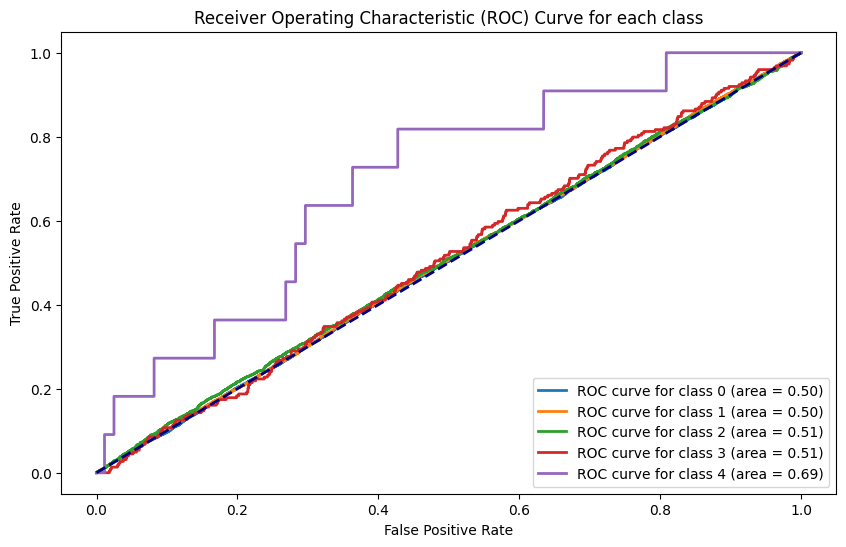

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Binarisez les étiquettes
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Création du modèle de régression logistique
model = OneVsRestClassifier(LogisticRegression())

# Entraînement du modèle
model.fit(X_train_PCA, y_train_PCA)

# Obtenez les scores de probabilité pour chaque classe
y_score = model.predict_proba(X_test_PCA)

# Calculez les courbes ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Affichage des courbes ROC pour chaque classe
plt.figure(figsize=(10, 6))

for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Création du modèle de régression logistique
model_LR = LogisticRegression()

# Entraînement du modèle sur les données d'entraînement
model_LR.fit(X_train_PCA, y_train_PCA)

# Prédiction sur l'ensemble de test
y_pred = model_LR.predict(X_test_PCA)

# Évaluation du modèle sur l'ensemble de test
accuracy = accuracy_score(y_test_PCA, y_pred)
precision = precision_score(y_test_PCA, y_pred, average='weighted')
recall = recall_score(y_test_PCA, y_pred, average='weighted')
f1 = f1_score(y_test_PCA, y_pred, average='weighted')

# Affichage des résultats sans validation croisée
print("Accuracy: %0.5f" % accuracy)
print("Precision: %0.5f" % precision)
print("Recall: %0.5f" % recall)
print("F-measure: %0.5f" % f1)

# Utilisation de la validation croisée pour évaluer les performances
cv_accuracy = cross_val_score(model_LR, X_train_PCA, y_train_PCA, cv=10, scoring='accuracy')
cv_precision = cross_val_score(model_LR, X_train_PCA, y_train_PCA, cv=10, scoring='precision_weighted')
cv_recall = cross_val_score(model_LR, X_train_PCA, y_train_PCA, cv=10, scoring='recall_weighted')
cv_f1 = cross_val_score(model_LR, X_train_PCA, y_train_PCA, cv=10, scoring='f1_weighted')

# Affichage des résultats avec validation croisée
print("Cross-validated Accuracy: %0.5f (+/- %0.5f)" % (cv_accuracy.mean(), cv_accuracy.std() * 2))
print("Cross-validated Precision: %0.5f (+/- %0.5f)" % (cv_precision.mean(), cv_precision.std() * 2))
print("Cross-validated Recall: %0.5f (+/- %0.5f)" % (cv_recall.mean(), cv_recall.std() * 2))
print("Cross-validated F-measure: %0.5f (+/- %0.5f)" % (cv_f1.mean(), cv_f1.std() * 2))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.96559
Precision: 0.96561
Recall: 0.96559
F-measure: 0.96559


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validated Accuracy: 0.96626 (+/- 0.00396)
Cross-validated Precision: 0.96608 (+/- 0.00398)
Cross-validated Recall: 0.96626 (+/- 0.00396)
Cross-validated F-measure: 0.96614 (+/- 0.00397)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


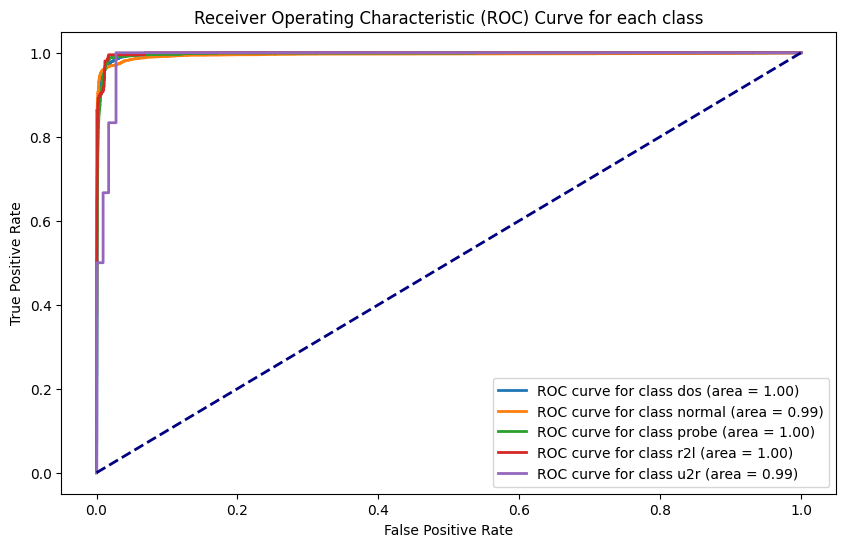

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

# Binarisez les étiquettes
class_labels = ["dos", "normal", "probe", "r2l", "u2r"]
y_test_bin = label_binarize(y_test_PCA, classes=class_labels)

# Création du modèle de régression logistique
model = LogisticRegression()

# Entraînement du modèle
model.fit(X_train_PCA, y_train_PCA)

# Obtenez les scores de probabilité pour chaque classe
y_score = model.predict_proba(X_test_PCA)

# Calculez les courbes ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Affichage des courbes ROC pour chaque classe
plt.figure(figsize=(10, 6))

for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {class_labels[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


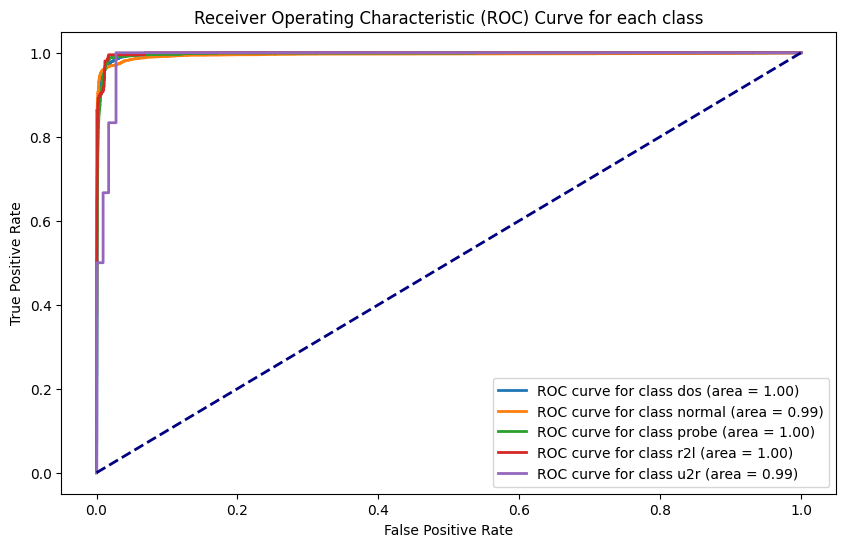

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

# Binarisez les étiquettes
class_labels = ["dos", "normal", "probe", "r2l", "u2r"]
y_test_bin = label_binarize(y_test_PCA, classes=class_labels)

# Création du modèle de régression logistique
model = LogisticRegression()

# Entraînement du modèle
model.fit(X_train_PCA, y_train_PCA)

# Obtenez les scores de probabilité pour chaque classe
y_score = model.predict_proba(X_test_PCA)

# Calculez les courbes ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Affichage des courbes ROC pour chaque classe
plt.figure(figsize=(10, 6))

for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {class_labels[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()
